# 3ª Atividade

## Ensemble Methods

In [2]:
import pandas as pd
from sklearn.base import BaseEstimator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Hard Voting


In [3]:
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [5]:
knn_clf = KNeighborsClassifier()
log_clf = LogisticRegression(random_state=42)
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('knn', knn_clf), ('lr', log_clf), ('tree', tree_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1,...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [6]:
for clf, label in zip([knn_clf, log_clf, tree_clf, svm_clf, voting_clf], ['KNN', 'Reg Logistica', 'tree', 'SVM', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.05) [KNN]
Accuracy: 0.92 (+/- 0.03) [Reg Logistica]
Accuracy: 0.95 (+/- 0.05) [tree]
Accuracy: 0.95 (+/- 0.03) [SVM]
Accuracy: 0.95 (+/- 0.05) [Ensemble]


Nota-se que, para a base Iris, não há diferença grande entre as performances dos diversos algoritmos.
Agora, vamos plotar gráficos que nos ajudarão a entender como os diferentes algortimos atuam nos dados da base Iris:

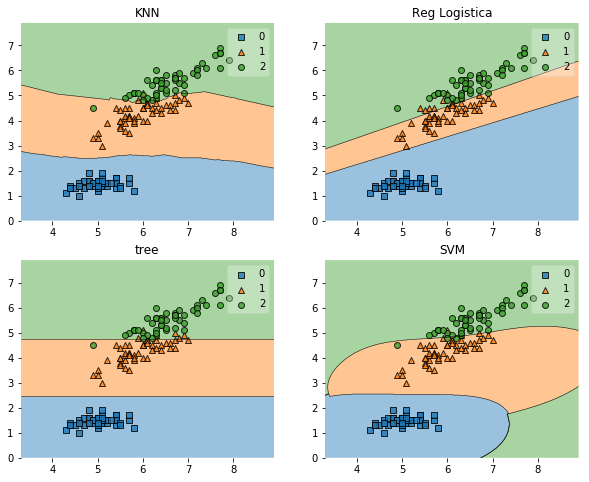

In [7]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))
for clf, lab, grd in zip([knn_clf, log_clf, tree_clf, svm_clf],
                         ['KNN', 'Reg Logistica', 'tree', 'SVM'],
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)

É possível visualizar, então, como os algoritmos performam juntos em um Hard Voting:

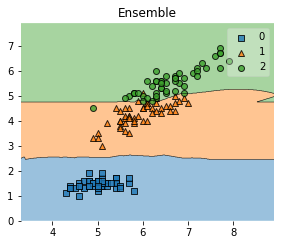

In [8]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))
for clf, lab, grd in zip([voting_clf],
                         ['Ensemble'],
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)

#### Gridsearch Para Hard Voting

In [9]:
params = { 'knn__n_neighbors':[1, 10], 'lr__C':[1, 10], 'tree__max_depth' : [2, 4], 'svc__C':[1, 10], 'svc__degree':[1, 2, 3]}

grid = GridSearchCV(estimator=voting_clf, param_grid=params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
   ...tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'knn__n_neighbors': [1, 10], 'lr__C': [1, 10], 'tree__max_depth': [2, 4], 'svc__C': [1, 10], 'svc__degree': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Agora, vamos visualizar os resultados de Hard Voting para diferentes parâmetros dos algoritmos:

In [10]:
cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r],
             grid.cv_results_[cv_keys[2]][r]))

0.958 +/- 0.03 {'knn__n_neighbors': 1, 'lr__C': 1, 'svc__C': 1, 'svc__degree': 1, 'tree__max_depth': 2}
0.950 +/- 0.03 {'knn__n_neighbors': 1, 'lr__C': 1, 'svc__C': 1, 'svc__degree': 1, 'tree__max_depth': 4}
0.958 +/- 0.03 {'knn__n_neighbors': 1, 'lr__C': 1, 'svc__C': 1, 'svc__degree': 2, 'tree__max_depth': 2}
0.950 +/- 0.03 {'knn__n_neighbors': 1, 'lr__C': 1, 'svc__C': 1, 'svc__degree': 2, 'tree__max_depth': 4}
0.958 +/- 0.03 {'knn__n_neighbors': 1, 'lr__C': 1, 'svc__C': 1, 'svc__degree': 3, 'tree__max_depth': 2}
0.950 +/- 0.03 {'knn__n_neighbors': 1, 'lr__C': 1, 'svc__C': 1, 'svc__degree': 3, 'tree__max_depth': 4}
0.958 +/- 0.03 {'knn__n_neighbors': 1, 'lr__C': 1, 'svc__C': 10, 'svc__degree': 1, 'tree__max_depth': 2}
0.950 +/- 0.03 {'knn__n_neighbors': 1, 'lr__C': 1, 'svc__C': 10, 'svc__degree': 1, 'tree__max_depth': 4}
0.958 +/- 0.03 {'knn__n_neighbors': 1, 'lr__C': 1, 'svc__C': 10, 'svc__degree': 2, 'tree__max_depth': 2}
0.950 +/- 0.03 {'knn__n_neighbors': 1, 'lr__C': 1, 'svc__C': 

In [10]:
for clf in (knn_clf, log_clf, tree_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, '\n\n', classification_report(y_test, y_pred))

KNeighborsClassifier 

              precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.91      1.00      0.95        10
          2       1.00      0.90      0.95        10

avg / total       0.97      0.97      0.97        30

LogisticRegression 

              precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.88      0.70      0.78        10
          2       0.75      0.90      0.82        10

avg / total       0.88      0.87      0.87        30

DecisionTreeClassifier 

              precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.82      0.90      0.86        10
          2       0.89      0.80      0.84        10

avg / total       0.90      0.90      0.90        30

SVC 

              precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          

### Soft Voting

A mesma análise será feita para os algoritmos juntos em Soft Voting:

In [11]:
svm_clfs = SVC(random_state=42, probability=True)

voting_clfs = VotingClassifier(
    estimators=[('knn', knn_clf), ('lr', log_clf), ('tree', tree_clf), ('svc', svm_clfs)],
    voting='soft')
voting_clfs.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1,...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

#### GridSearch para SoftVoting

In [12]:
grids = GridSearchCV(estimator=voting_clfs, param_grid=params, cv=5)
grids.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
   ...tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'knn__n_neighbors': [1, 10], 'lr__C': [1, 10], 'tree__max_depth': [2, 4], 'svc__C': [1, 10], 'svc__degree': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:
cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r],
             grid.cv_results_[cv_keys[2]][r]))

0.958 +/- 0.03 {'knn__n_neighbors': 1, 'lr__C': 1, 'svc__C': 1, 'svc__degree': 1, 'tree__max_depth': 2}
0.950 +/- 0.03 {'knn__n_neighbors': 1, 'lr__C': 1, 'svc__C': 1, 'svc__degree': 1, 'tree__max_depth': 4}
0.958 +/- 0.03 {'knn__n_neighbors': 1, 'lr__C': 1, 'svc__C': 1, 'svc__degree': 2, 'tree__max_depth': 2}
0.950 +/- 0.03 {'knn__n_neighbors': 1, 'lr__C': 1, 'svc__C': 1, 'svc__degree': 2, 'tree__max_depth': 4}
0.958 +/- 0.03 {'knn__n_neighbors': 1, 'lr__C': 1, 'svc__C': 1, 'svc__degree': 3, 'tree__max_depth': 2}
0.950 +/- 0.03 {'knn__n_neighbors': 1, 'lr__C': 1, 'svc__C': 1, 'svc__degree': 3, 'tree__max_depth': 4}
0.958 +/- 0.03 {'knn__n_neighbors': 1, 'lr__C': 1, 'svc__C': 10, 'svc__degree': 1, 'tree__max_depth': 2}
0.950 +/- 0.03 {'knn__n_neighbors': 1, 'lr__C': 1, 'svc__C': 10, 'svc__degree': 1, 'tree__max_depth': 4}
0.958 +/- 0.03 {'knn__n_neighbors': 1, 'lr__C': 1, 'svc__C': 10, 'svc__degree': 2, 'tree__max_depth': 2}
0.950 +/- 0.03 {'knn__n_neighbors': 1, 'lr__C': 1, 'svc__C': 

In [13]:
for clf, label in zip([knn_clf, log_clf, tree_clf, svm_clfs, voting_clfs], ['KNN', 'Reg Logistica', 'tree', 'SVM', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.05) [KNN]
Accuracy: 0.92 (+/- 0.03) [Reg Logistica]
Accuracy: 0.95 (+/- 0.05) [tree]
Accuracy: 0.95 (+/- 0.03) [SVM]
Accuracy: 0.95 (+/- 0.04) [Ensemble]


In [15]:
for clf in (knn_clf, log_clf, tree_clf, svm_clfs, voting_clfs):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, '\n\n', classification_report(y_test, y_pred))

KNeighborsClassifier 

              precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.91      1.00      0.95        10
          2       1.00      0.90      0.95        10

avg / total       0.97      0.97      0.97        30

LogisticRegression 

              precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.88      0.70      0.78        10
          2       0.75      0.90      0.82        10

avg / total       0.88      0.87      0.87        30

DecisionTreeClassifier 

              precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.82      0.90      0.86        10
          2       0.89      0.80      0.84        10

avg / total       0.90      0.90      0.90        30

SVC 

              precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          

Nota-se que o desempenho do método Soft Voting, em precision, ficou ligeiramente abaixo do desempenho do método Hard Voting

## Bagging

GridSearching para Bagging com diferentes parâmetros:

In [14]:
param_grid = {'max_samples': [0.5, 1.0], 'n_estimators':  [2,6,10, 20], 
          'max_features': [1, 2],
         'base_estimator': [None, DecisionTreeClassifier(), KNeighborsClassifier(), SVC()]}

grid = GridSearchCV(BaggingClassifier(random_state=42), param_grid)
grid.fit(X_train, y_train)
grid.best_params_

{'base_estimator': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform'),
 'max_features': 1,
 'max_samples': 1.0,
 'n_estimators': 10}

In [15]:
y_pred =  grid.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9


In [16]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.82      0.90      0.86        10
          2       0.89      0.80      0.84        10

avg / total       0.90      0.90      0.90        30



## Random Forest

In [24]:
param_grid_rf = {'n_estimators':  [100, 200, 400], 
          'max_depth': [10, 15, 30], 'max_features': ['auto', 'sqrt', 'log2']}
rfc = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(estimator=rfc, param_grid=param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 400], 'max_depth': [10, 15, 30], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
grid_rf.best_params_

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}

In [30]:
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(ada_clf, '\n\n', classification_report(y_test, y_pred_rfc))

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=42) 

              precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.82      0.90      0.86        10
          2       0.89      0.80      0.84        10

avg / total       0.90      0.90      0.90        30



## Boosting

### AdaBoost

In [26]:
param_grid_ada = {'base_estimator__max_depth': [10, 15, 20], 'n_estimators': [100, 200, 500],
                 'learning_rate': [0.5, 1, 2]}
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(), random_state=42)
grid_ada = GridSearchCV(estimator=ada_clf, param_grid=param_grid_ada, cv=5)
grid_ada.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=42),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'base_estimator__max_depth': [10, 15, 20], 'n_estimators': [100, 200, 500], 'learning_rate': [0.5, 1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
grid_ada.best_params_

{'base_estimator__max_depth': 10, 'learning_rate': 0.5, 'n_estimators': 200}

In [29]:
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
print(ada_clf, '\n\n', classification_report(y_test, y_pred_ada))

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=42) 

              precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.80      0.80      0.80        10
          2       0.80      0.80      0.80        10

avg / total       0.87      0.87      0.87        30



### GradientBoosting

In [33]:
param_grid_gradient = {'max_depth': [10, 15, 20], 'n_estimators': [100, 200, 500],
                 'learning_rate': [0.5, 1, 2]}
gb_clf = GradientBoostingClassifier(random_state=42)
grid_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid_gradient, cv=5)
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [10, 15, 20], 'n_estimators': [100, 200, 500], 'learning_rate': [0.5, 1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
grid_gb.best_params_

{'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}

In [35]:
gb_clf.fit(X_train, y_train)
y_pred_gb = ada_clf.predict(X_test)
print(gb_clf, '\n\n', classification_report(y_test, y_pred_gb))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False) 

              precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.80      0.80      0.80        10
          2       0.80      0.80      0.80        10

avg / total       0.87      0.87      0.87        30

